In [29]:
# TODO 
# for reprociblity set random seed -- it should be the last two digits of your student ID 

### Image Modality: Chest X-Ray Classification

#### Objective
In this homework we focus on multi-label classification of chest X-ray images from the CheXpert dataset. 

We will classify images for five common thoracic pathologies: 'Cardiomegaly', 'Edema', 'Consolidation', 'Pneumonia', and 'No Finding'.


#### Deliverables

-   A **clean Jupyter Notebook** with:
    -   Code cells (organized with headers), create cells whenever needed. 
    -   Outputs (EDA figures, evaluation reports, confusion matrices).
    -   Written answers to all reflection/discussion questions, create cells whenver needed (in markdown cells). 

### First Step

We will use the Kaggle dataset **`CheXpertDataset`**.  
Please download the dataset using this link: [Link](https://www.kaggle.com/datasets/ashery/chexpert)


In [3]:
import pandas as pd
import numpy as np

data = pd.read_csv("train.csv")
data.head()

,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices
0,CheXpert-v1.0-small/train/patient00001/study1/...,Female,68,Frontal,AP,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.0
1,CheXpert-v1.0-small/train/patient00002/study2/...,Female,87,Frontal,AP,NaN,NaN,-1.0,1.0,NaN,-1.0,-1.0,NaN,-1.0,NaN,-1.0,NaN,1.0,NaN
2,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Frontal,AP,NaN,NaN,NaN,1.0,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN
3,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Lateral,NaN,NaN,NaN,NaN,1.0,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN
4,CheXpert-v1.0-small/train/patient00003/study1/...,Male,41,Frontal,AP,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN


In [5]:
data.isnull().sum()

Path                               0
Sex                                0
Age                                0
Frontal/Lateral                    0
AP/PA                          32387
No Finding                    201033
Enlarged Cardiomediastinum    178575
Cardiomegaly                  177211
Lung Opacity                  105636
Lung Lesion                   211470
Edema                         137458
Consolidation                 152792
Pneumonia                     195806
Atelectasis                   154971
Pneumothorax                  144480
Pleural Effusion               90203
Pleural Other                 216922
Fracture                      211220
Support Devices               100197
dtype: int64

In [7]:
data = data.fillna(0)

In [9]:
columns = ["Cardiomegaly", "Edema", "Consolidation", "Pneumonia", "No Finding"]

data[columns] = data[columns].replace({-1: 1})
data.head()

,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices
0,CheXpert-v1.0-small/train/patient00001/study1/...,Female,68,Frontal,AP,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,CheXpert-v1.0-small/train/patient00002/study2/...,Female,87,Frontal,AP,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,-1.0,0.0,-1.0,0.0,1.0,0.0
2,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Frontal,AP,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Lateral,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,CheXpert-v1.0-small/train/patient00003/study1/...,Male,41,Frontal,AP,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
data["Path"] = data["Path"].apply(lambda i: i[25:])

### Exploring the Data (10 pts)


1. Display a few corresponding input & output samples 

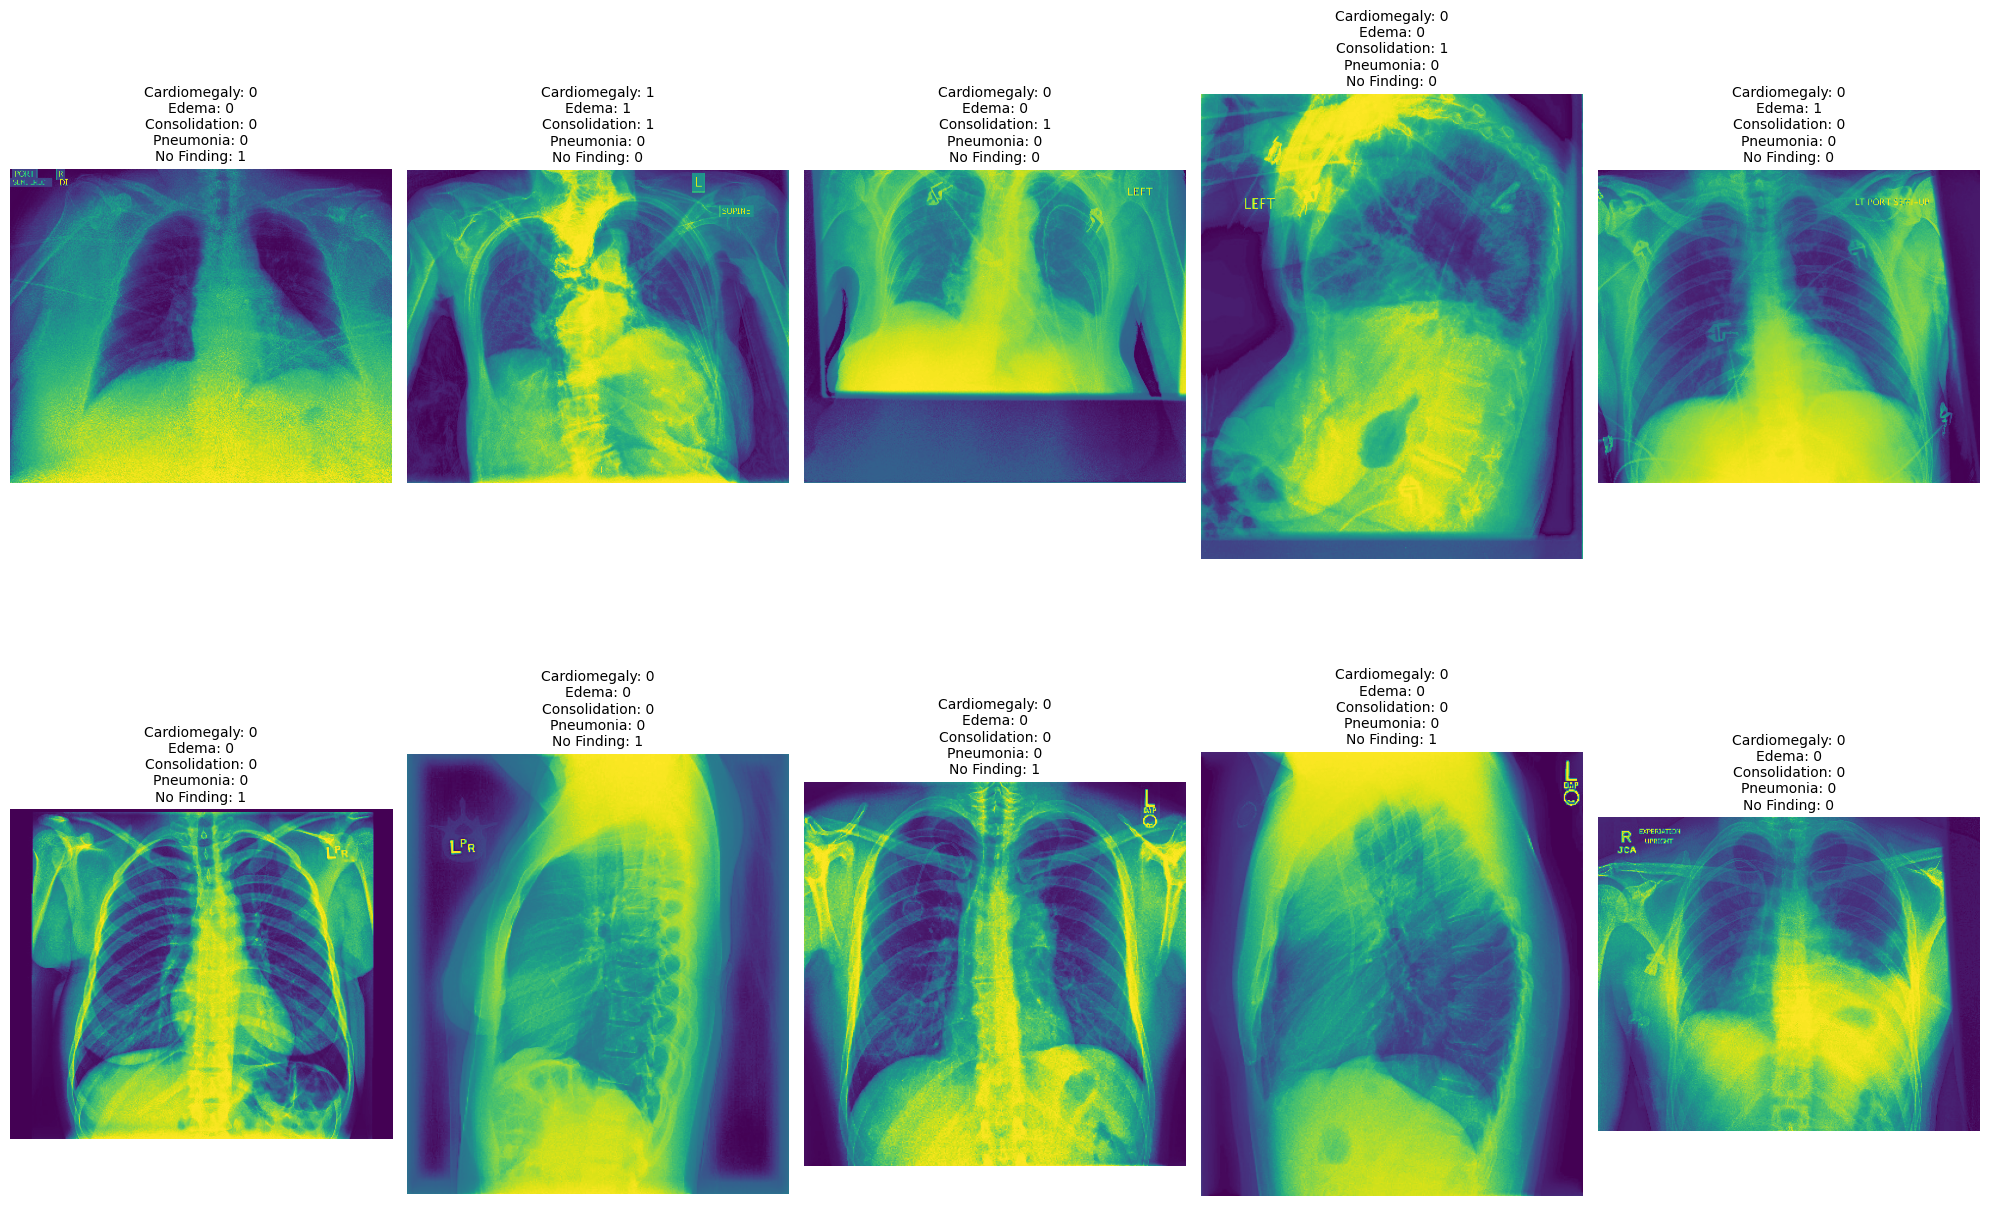

In [35]:
import matplotlib.pyplot as plt
from PIL import Image

data1 = data.head(10)
plt.figure(figsize = (20, 14))

for i, j in data1.iterrows():
    img_path = "train\\" + j['Path']
    img = Image.open(img_path)
    
    ls = [f"{k}: {int(j[k])}" for k in columns]
    s = "\n".join(ls)
    
    plt.subplot(2, 5, i + 1)
    plt.imshow(img)
    plt.axis("off")
    plt.title(s, fontsize=10)

plt.tight_layout()
plt.show()

2. Explain what input & ouput samples represent? 

The input samples represent chest radiographs of 10 patients containing frontal and lateral views. The output samples represent the presence of "Cardiomegaly", "Edema", "Consolidation", "Pneumonia", and "No Finding" labels of those images (1 representing precence of the pathology and 0 representing its absence).

3. Report class distribution and discuss imbalance (e.g., using countplot).

The below bar graph shows the class distribution of the number of samples in which each of the pathologies is present. The number of samples with "Edema", "Consolidation", and "Cardiomegaly" labels are comparatively higher compared to the ones with "Pneumonia" and "No Finding".

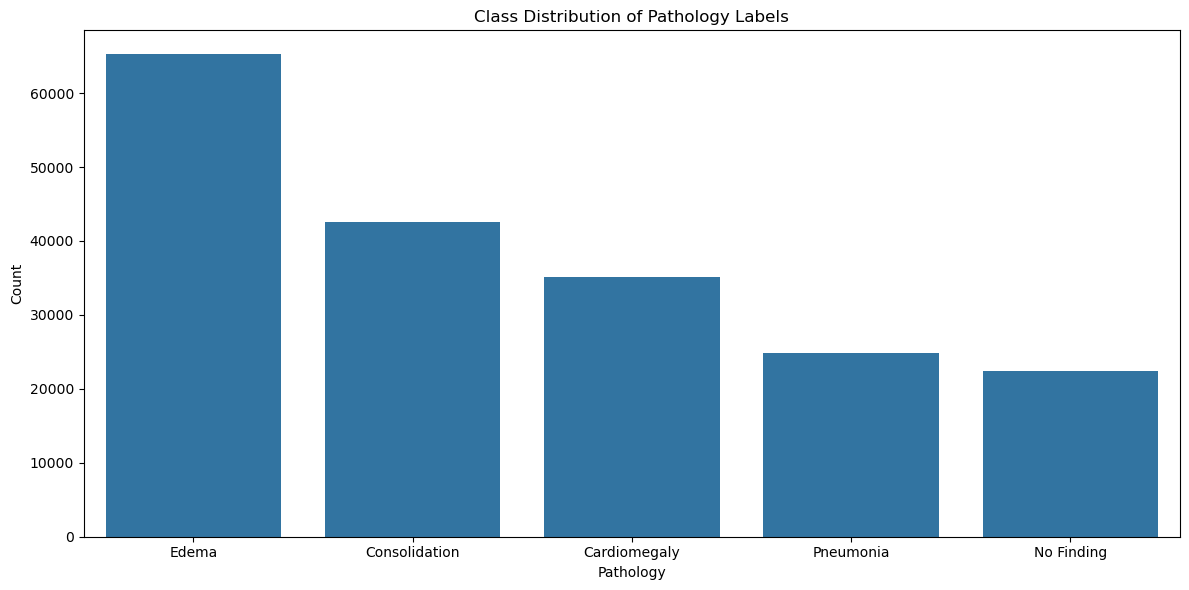

In [44]:
import seaborn as sns

data2 = data[columns].melt(var_name = "Condition", value_name = "Presence")

data2= data2[data2["Presence"] == 1]

plt.figure(figsize = (12, 6))
sns.countplot(x = "Condition", data = data2, order = data2["Condition"].value_counts().index)
plt.xticks()
plt.title("Class Distribution of Pathology Labels")
plt.xlabel("Pathology")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

#### Preprocessing (10 pts)

1. Check if preprocessing is necessary for this data (e.g., grayscale conversion, normalization, ...)
2. Split into train/test (e.g., 80/20), stratified by specialty.
   - For hyper-parameter tuning use 10% of training data as validation set. 

In [25]:
from PIL import Image
from tqdm import tqdm

def get_img_arr(img_path):
    img = Image.open(img_path).convert('L')
    img = img.resize((128, 128))
    img = np.array(img, dtype = np.float32) / 255.0
    img = np.expand_dims(img, axis = -1)
    return img

data1 = data.sample(10000, random_state = 74).reset_index(drop = True)

ls = []

for i in tqdm(data1["Path"].values):
    img_arr = get_img_arr("train/" + i)
    ls.append(img_arr)

100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:42<00:00, 236.14it/s]


In [27]:
from sklearn.model_selection import train_test_split

X = np.stack(ls)
y = data1[["Cardiomegaly", "Edema", "Consolidation", "Pneumonia", "No Finding"]].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 74)

### Classification Experiments (Total 60 pts)

We will conduct **stepwise experiments**, starting from baseline models toward more advanced methods.


### Experimental Design

### 1. Evaluation:
  -  Classification_report
  -  Confusion matrix plot   
  -  Perform **error analysis**: show a few false positives and false negatives, and explain possible reasons.

### 2. Methods

#### Model 1: A Simple CNN (30 pts)

Define a basic Convolutional Neural Network (CNN) for feature extraction followed by fully connected (Linear) classifier


#### Model 2: ResNet with Transfer Learning (30)

**Transfer learning** is a technique where a model pre-trained on a large dataset (like ImageNet) is adapted for a new, specific task. This is highly effective because the pre-trained model has already learned to recognize general visual features like edges, textures, and shapes.

The approach usually include these three steps :
* Choose a pre-trained model (e.g., ResNet, VGG, EfficientNet).
* Load model without final layer (keep convolutional base).
* Training: 
    * Freeze base layers (retain general features).
    * Add new classifier head (dense layers matching target classes).
    * Train new layers first (higher learning rate).
* Optionally fine-tune deeper layers (small learning rate).
* Evaluate & regularize (early stopping, dropout, augmentation).
    * Iterate if needed (try different architectures, adjust freezing).



#### Model 1: A Simple CNN

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation = "relu", input_shape=(128, 128, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation = "relu"),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation = "relu"),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation = "relu"),
    Dropout(0.3),
    Dense(y.shape[1], activation = "sigmoid") 
])

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

model.summary()

C:\Users\Anjana\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 126, 126, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,304,709 (12.61 MB)

 Trainable params: 3,304,709 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [31]:
history = model.fit(X_train, y_train, validation_split = 0.1, epochs = 50, batch_size = 32)

Epoch 1/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 36s 150ms/step - accuracy: 0.2179 - loss: 0.4592 - val_accuracy: 0.2362 - val_loss: 0.4240
Epoch 2/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 39s 171ms/step - accuracy: 0.2607 - loss: 0.4214 - val_accuracy: 0.2425 - val_loss: 0.4185
Epoch 3/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 39s 175ms/step - accuracy: 0.2591 - loss: 0.4145 - val_accuracy: 0.2387 - val_loss: 0.4161
Epoch 4/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 39s 172ms/step - accuracy: 0.2882 - loss: 0.4076 - val_accuracy: 0.2537 - val_loss: 0.4175
Epoch 5/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 40s 177ms/step - accuracy: 0.2978 - loss: 0.3985 - val_accuracy: 0.2663 - val_loss: 0.4168
Epoch 6/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 39s 172ms/step - accuracy: 0.3215 - loss: 0.3956 - val_accuracy: 0.2575 - val_loss: 0.4169
Epoch 7/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 39s 175ms/step - accuracy: 0.3362 - loss: 0.3801 - val_accuracy: 0.2725 - val_loss: 0.4274
Epoch 8/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 39s 175ms/step - accuracy: 0.3439 - loss: 0

#### Evaluation

63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step
               precision    recall  f1-score   support

 Cardiomegaly       0.25      0.12      0.17       309
        Edema       0.51      0.42      0.46       602
Consolidation       0.23      0.09      0.12       349
    Pneumonia       0.08      0.02      0.03       232
   No Finding       0.36      0.12      0.18       211

    micro avg       0.39      0.20      0.27      1703
    macro avg       0.29      0.15      0.19      1703
 weighted avg       0.33      0.20      0.24      1703
  samples avg       0.15      0.13      0.13      1703



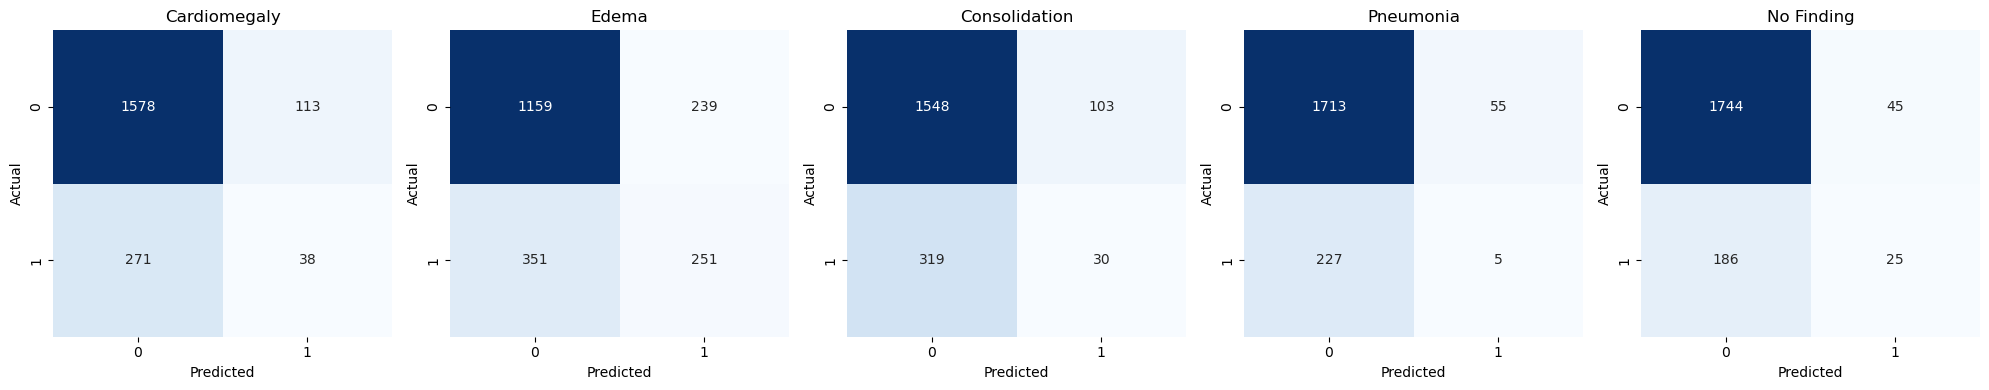

In [37]:
import seaborn as sns
from sklearn.metrics import multilabel_confusion_matrix, classification_report

y_pred = (model.predict(X_test) >= 0.5).astype(int)

print(classification_report(y_test, y_pred, target_names = columns, zero_division = 0))

confusion_matrices = multilabel_confusion_matrix(y_test, y_pred)

fig, axes = plt.subplots(1, len(columns), figsize = (20, 4))

for i, (ax, j) in enumerate(zip(axes, columns)):
    cm = confusion_matrices[i]
    sns.heatmap(cm, annot = True, fmt = "d", cmap = "Blues", cbar = False, ax = ax)
    ax.set_title(j)
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")

plt.tight_layout()
plt.show()

#### Model 2: ResNet with Transfer Learning

In [11]:
def get_img_arr1(img_path):
    img = Image.open(img_path).convert("RGB")
    img = img.resize((224, 224))
    img = np.array(img, dtype = np.float32) / 255.0
    return img

ls = []

for i in tqdm(data1["Path"].values):
    img_arr = get_img_arr1("train/" + i)
    ls.append(img_arr)

100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [01:36<00:00, 103.96it/s]


In [15]:
X = np.stack(ls)
y = data1[["Cardiomegaly", "Edema", "Consolidation", "Pneumonia", "No Finding"]].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 74)

In [17]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

base_model = ResNet50(weights = "imagenet", include_top = False, input_shape = (224, 224, 3))

for layer in base_model.layers[:-80]:
    layer.trainable = False
    
for layer in base_model.layers[-80:]:
    layer.trainable = True

x = base_model.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.BatchNormalization()(x)
x = layers.Dense(256, activation = "relu")(x)
x = layers.Dropout(0.2)(x)
outputs = layers.Dense(5, activation = "sigmoid")(x)

model = models.Model(inputs = base_model.input, outputs = outputs)

model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 3e-5), loss = "binary_crossentropy", metrics = ["accuracy"])

model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_pad (ZeroPadding2D)     │ (None, 230, 230, 3)       │               0 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_conv (Conv2D)           │ (None, 112, 112, 64)      │           9,472 │ conv1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_bn (BatchNormalization) │ (None, 112, 112, 64)      │             256 │ conv1_conv[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_relu (Activation)       │ (None, 112, 112, 64)      │               0 │ conv1_bn[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pad (ZeroPadding2D)     │ (None, 114, 114, 64)      │               0 │ conv1_relu[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pool (MaxPooling2D)     │ (None, 56, 56, 64)        │               0 │ pool1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_conv (Conv2D)  │ (None, 56, 56, 64)        │           4,160 │ pool1_pool[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_bn             │ (None, 56, 56, 64)        │             256 │ conv2_block1_1_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_relu           │ (None, 56, 56, 64)        │               0 │ conv2_block1_1_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_conv (Conv2D)  │ (None, 56, 56, 64)        │          36,928 │ conv2_block1_1_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_bn             │ (None, 56, 56, 64)        │             256 │ conv2_block1_2_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_relu           │ (None, 56, 56, 64)        │               0 │ conv2_block1_2_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_0_conv (Conv2D)  │ (None, 56, 56, 256)       │          16,640 │ pool1_pool[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_3_conv (Conv2D)  │ (None, 56, 56, 256)       │          16,640 │ conv2_block1_2_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 24,121,733 (92.02 MB)

 Trainable params: 20,836,613 (79.49 MB)

 Non-trainable params: 3,285,120 (12.53 MB)

In [19]:
callbacks = [EarlyStopping(monitor = "val_accuracy", mode = "max", patience = 4, restore_best_weights = True),
    ReduceLROnPlateau(monitor = "val_accuracy", mode = "max", factor = 0.5, patience = 2),
    ModelCheckpoint("resnet_finetuned_best.keras", save_best_only = True, monitor = "val_accuracy", mode = "max")
]

In [21]:
history = model.fit(X_train, y_train, validation_split = 0.1, epochs = 10, batch_size = 32, callbacks = callbacks)

Epoch 1/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 1174s 5s/step - accuracy: 0.2012 - loss: 0.5971 - val_accuracy: 0.2087 - val_loss: 0.5352 - learning_rate: 3.0000e-05
Epoch 2/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 1108s 5s/step - accuracy: 0.2697 - loss: 0.4586 - val_accuracy: 0.2325 - val_loss: 0.4561 - learning_rate: 3.0000e-05
Epoch 3/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 1175s 5s/step - accuracy: 0.2773 - loss: 0.4380 - val_accuracy: 0.2300 - val_loss: 0.4484 - learning_rate: 3.0000e-05
Epoch 4/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 1171s 5s/step - accuracy: 0.2876 - loss: 0.4261 - val_accuracy: 0.2138 - val_loss: 0.5006 - learning_rate: 3.0000e-05
Epoch 5/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 676s 3s/step - accuracy: 0.3084 - loss: 0.4066 - val_accuracy: 0.2550 - val_loss: 0.4297 - learning_rate: 1.5000e-05
Epoch 6/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 700s 3s/step - accuracy: 0.3413 - loss: 0.3935 - val_accuracy: 0.3013 - val_loss: 0.4645 - learning_rate: 1.5000e-05
Epoch 7/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 701s 3s/step -

In [23]:
for layer in base_model.layers[-140:]:
    layer.trainable = True

model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-5), loss = "binary_crossentropy", metrics=["accuracy"])

model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_pad (ZeroPadding2D)     │ (None, 230, 230, 3)       │               0 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_conv (Conv2D)           │ (None, 112, 112, 64)      │           9,472 │ conv1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_bn (BatchNormalization) │ (None, 112, 112, 64)      │             256 │ conv1_conv[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_relu (Activation)       │ (None, 112, 112, 64)      │               0 │ conv1_bn[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pad (ZeroPadding2D)     │ (None, 114, 114, 64)      │               0 │ conv1_relu[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pool (MaxPooling2D)     │ (None, 56, 56, 64)        │               0 │ pool1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_conv (Conv2D)  │ (None, 56, 56, 64)        │           4,160 │ pool1_pool[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_bn             │ (None, 56, 56, 64)        │             256 │ conv2_block1_1_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_relu           │ (None, 56, 56, 64)        │               0 │ conv2_block1_1_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_conv (Conv2D)  │ (None, 56, 56, 64)        │          36,928 │ conv2_block1_1_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_bn             │ (None, 56, 56, 64)        │             256 │ conv2_block1_2_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_relu           │ (None, 56, 56, 64)        │               0 │ conv2_block1_2_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_0_conv (Conv2D)  │ (None, 56, 56, 256)       │          16,640 │ pool1_pool[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_3_conv (Conv2D)  │ (None, 56, 56, 256)       │          16,640 │ conv2_block1_2_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 24,121,733 (92.02 MB)

 Trainable params: 23,854,853 (91.00 MB)

 Non-trainable params: 266,880 (1.02 MB)

In [25]:
fine_tune_history = model.fit(X_train, y_train, validation_split = 0.1, epochs = 10, batch_size=32, callbacks = callbacks)

Epoch 1/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 1170s 5s/step - accuracy: 0.2056 - loss: 0.5728 - val_accuracy: 0.4187 - val_loss: 0.5698 - learning_rate: 1.0000e-05
Epoch 2/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 1114s 5s/step - accuracy: 0.3043 - loss: 0.4291 - val_accuracy: 0.3338 - val_loss: 0.4885 - learning_rate: 1.0000e-05
Epoch 3/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 1116s 5s/step - accuracy: 0.3814 - loss: 0.3616 - val_accuracy: 0.2862 - val_loss: 0.4422 - learning_rate: 1.0000e-05
Epoch 4/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 1115s 5s/step - accuracy: 0.4699 - loss: 0.3119 - val_accuracy: 0.2650 - val_loss: 0.4383 - learning_rate: 5.0000e-06
Epoch 5/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 1112s 5s/step - accuracy: 0.4750 - loss: 0.2854 - val_accuracy: 0.2775 - val_loss: 0.4422 - learning_rate: 5.0000e-06


#### Evaluation

63/63 ━━━━━━━━━━━━━━━━━━━━ 83s 1s/step
               precision    recall  f1-score   support

 Cardiomegaly       0.19      0.33      0.24       309
        Edema       0.29      0.04      0.07       602
Consolidation       0.23      0.06      0.10       349
    Pneumonia       0.00      0.00      0.00       232
   No Finding       0.00      0.00      0.00       211

    micro avg       0.20      0.09      0.12      1703
    macro avg       0.14      0.09      0.08      1703
 weighted avg       0.18      0.09      0.09      1703
  samples avg       0.06      0.05      0.05      1703



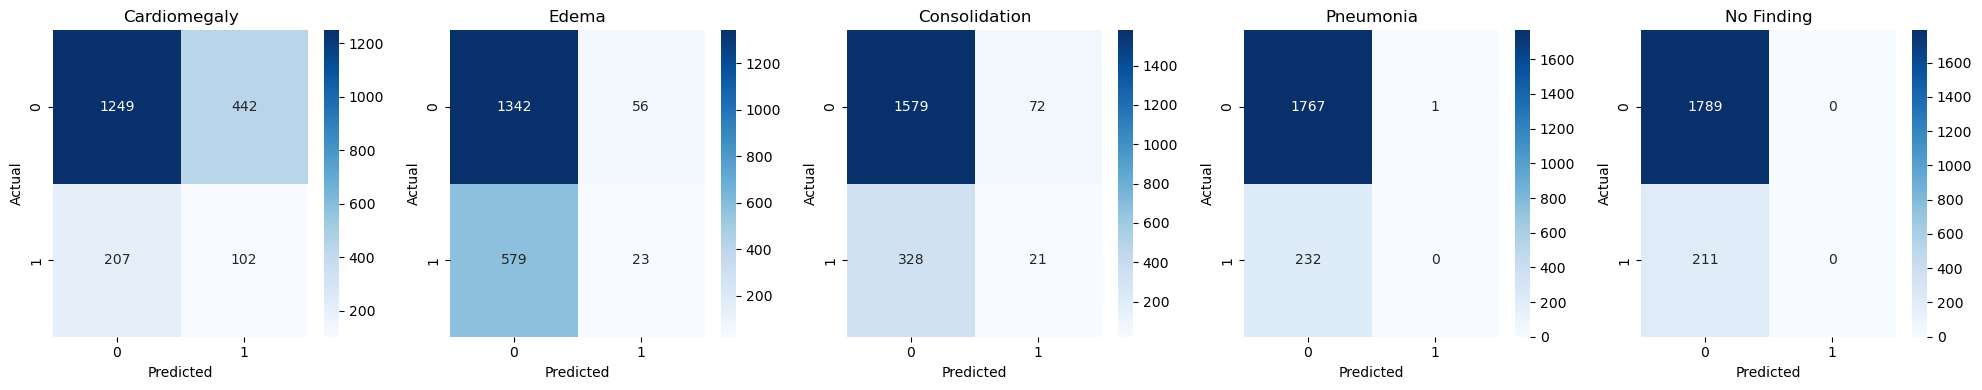

In [33]:
from sklearn.metrics import multilabel_confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

y_pred = (model.predict(X_test) >= 0.5).astype(int)

print(classification_report(y_test, y_pred, target_names = columns, zero_division = 0))

confusion_matrices = multilabel_confusion_matrix(y_test, y_pred)

fig, axes = plt.subplots(1, len(columns), figsize=(20, 4))
for i, (ax, j) in enumerate(zip(axes, columns)):
    cm = confusion_matrices[i]
    sns.heatmap(cm, annot = True, fmt = "d", cmap = "Blues", ax = ax)
    ax.set_title(j)
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")

plt.tight_layout()
plt.show()

### Discussion (20 pts)

After completing experiments, answer:

1. Compare results of both impolementations:   
     - Does pretrained initialization improve performance or convergence?  
2.  What are other better options to improve the performance? 
      - Without implementation, discuss from a high level perspective what are more advanced appraoches that might lead to better results. 

The pretrained initialization improved the model's convergence but had accuracy similar to that of the base CNN model. The base CNN model generalized better over the given data, but the ResNet model trained with freezing base layers was not able to obtain a higher accuracy as it was not pre-trained on the Chest X-Ray images. Approaches like fine-tuning, data augmentation, and adding high resolution inputs can improve the model's performance. Training the ResNet model with Chest X-Ray images and using transformer-based models can improve the model's accuracy while predicting the given Chest X-Ray images.